In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
cattle_dataset = pd.read_csv('synthetic cattle_dataset.csv')


In [4]:
cattle_dataset.head()

,body_temperature,breed_type,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,faecal_consistency,health_status
0,40.3,Cross Breed,10.1,19.0,5004.0,7.2,5.0,44.0,1.8,16.4,3.2,3.0,Fresh blood in faeces,unhealthy
1,38.6,Cross Breed,14.3,26.0,11678.0,3.7,2.0,57.0,2.3,14.0,4.5,2.0,Fresh blood in faeces,unhealthy
2,39.4,Cross Breed,13.2,14.0,5282.0,6.4,2.0,52.0,1.8,16.4,3.2,3.0,ideal,unhealthy
3,39.7,Cross Breed,12.1,31.0,5236.0,6.8,3.0,53.0,1.4,16.3,5.3,3.0,extremely firm,unhealthy
4,40.2,Cross Breed,6.7,23.0,5004.0,7.2,5.0,49.0,1.9,15.4,3.4,3.0,very liquid faeces,unhealthy


In [5]:
cattle_dataset = cattle_dataset.drop('faecal_consistency', axis=1)
cattle_dataset.dropna(inplace=True)

cattle_dataset.isnull().sum()


body_temperature        0
breed_type              0
milk_production         0
respiratory_rate        0
walking_capacity        0
sleeping_duration       0
body_condition_score    0
heart_rate              0
eating_duration         0
lying_down_duration     0
ruminating              0
rumen_fill              0
health_status           0
dtype: int64

In [6]:
# for column in cattle_dataset.columns:
#     plt.hist(cattle_dataset[column])
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.title(f'Histogram of {column}')
#     plt.show()

#### correlation matrix

/tmp/ipykernel_4151/2106109792.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cattle_dataset.corr()


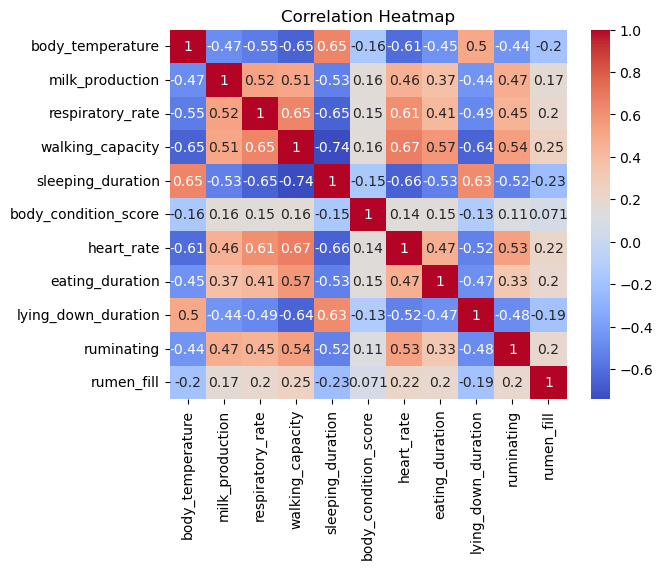

In [7]:

# Calculate the correlation matrix
correlation = cattle_dataset.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



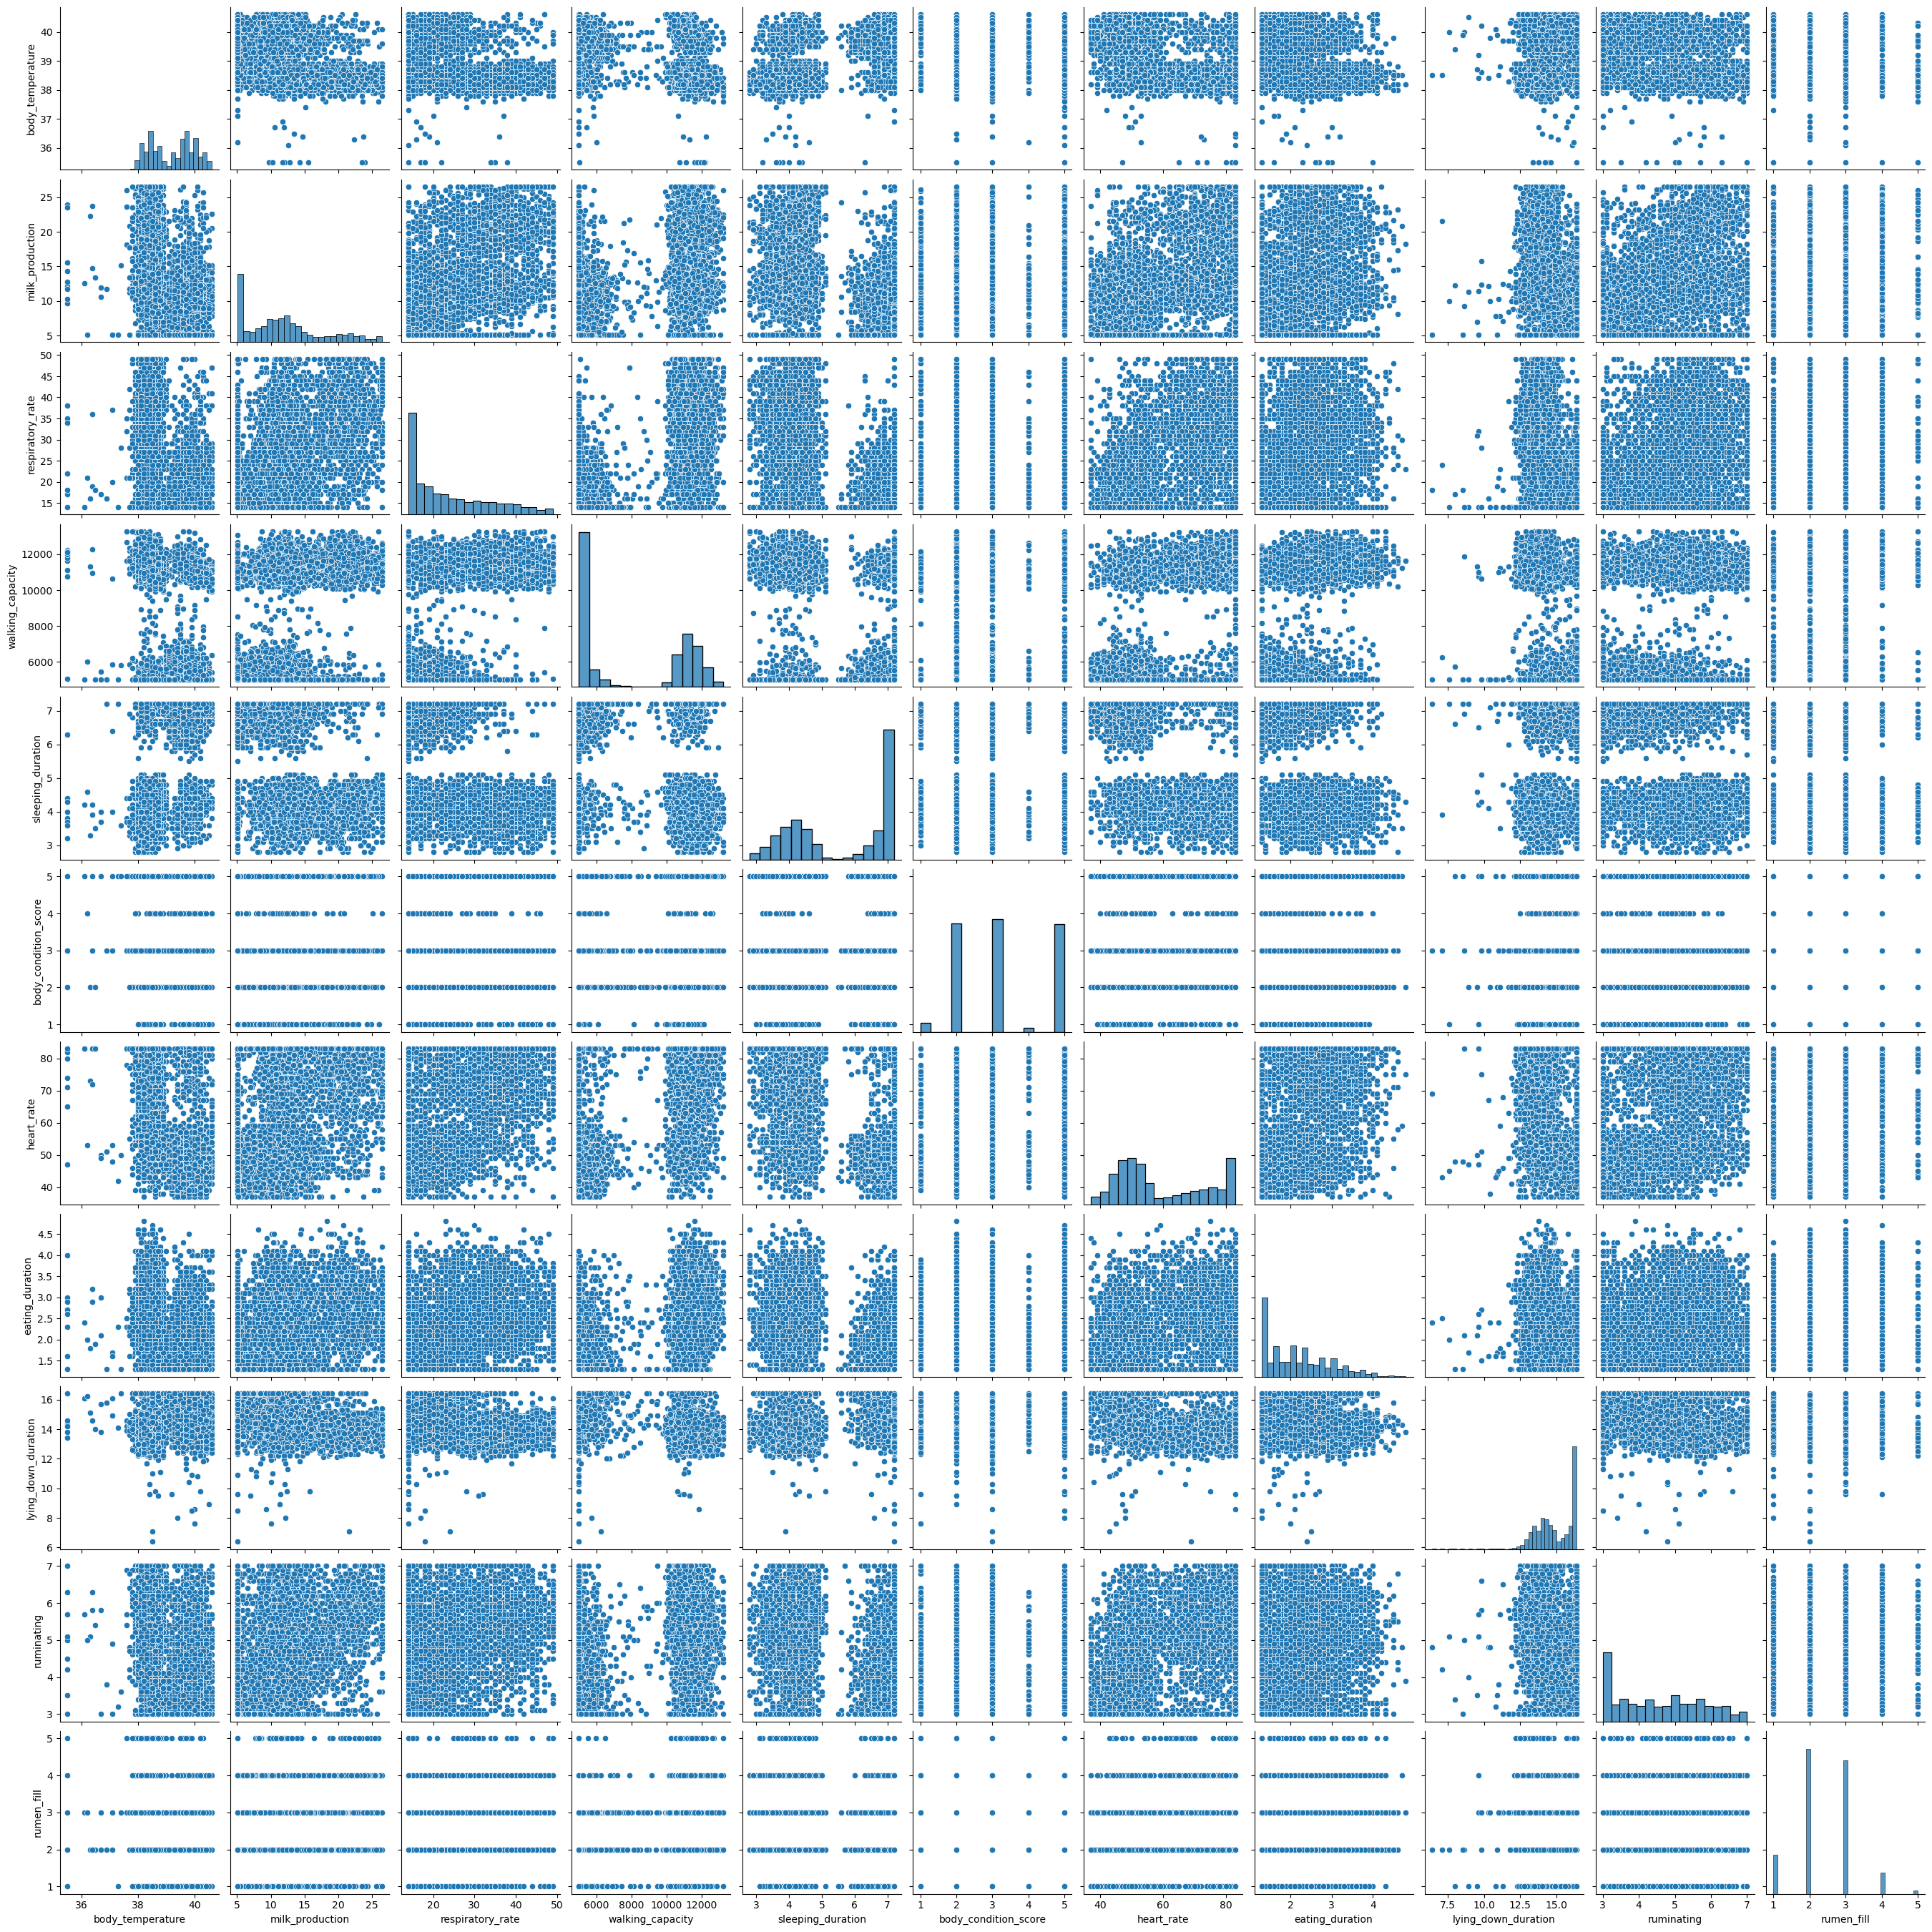

In [8]:
sns.pairplot(cattle_dataset)
plt.show()

In [9]:
X = cattle_dataset.drop('health_status', axis=1)
y = cattle_dataset['health_status']


In [10]:
print("Total number of rows:", cattle_dataset.shape[0])



Total number of rows: 5000


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_test.head()

,body_temperature,breed_type,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill
1501,38.4,Normal Breed,8.5,46.0,10773.0,3.7,5.0,68.0,2.0,14.4,5.1,3.0
2586,39.9,Cross Breed,5.1,24.0,5004.0,7.2,3.0,50.0,1.3,16.4,3.1,1.0
2653,40.3,Normal Breed,5.1,15.0,5004.0,7.2,2.0,48.0,1.3,16.4,3.2,3.0
1055,39.5,Normal Breed,14.7,14.0,5004.0,6.5,2.0,49.0,1.3,15.9,4.5,2.0
705,39.9,Normal Breed,9.7,20.0,5004.0,6.6,2.0,55.0,1.3,16.4,4.7,2.0


In [13]:
y_train = y_train.replace({'healthy': 1, 'unhealthy': 0})
y_test = y_test.replace({'healthy': 1, 'unhealthy': 0})

In [14]:
print("Training set shape:", y_train.shape)
print("Testing set shape:", y_test.shape)


Training set shape: (4000,)
Testing set shape: (1000,)


In [15]:
X_train = X_train.drop('breed_type', axis=1)
X_test = X_test.drop('breed_type', axis=1)

### linear regression

In [16]:
from sklearn.linear_model import LinearRegression


# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the performance score (R-squared)
linr_score = r2_score(y_test, y_pred)

# Print the performance score
print("Performance score:", linr_score)


Performance score: 0.5635398692117914


### logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression


# Create a logistic regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the performance score (accuracy)
logr_score = accuracy_score(y_test, y_pred)

# Print the performance score
print("Performance score:", logr_score)


Performance score: 0.852


/home/sam/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Classifer

In [18]:
from sklearn.tree import DecisionTreeClassifier


# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate the performance score (accuracy)
dtc_score = accuracy_score(y_test, y_pred)

# Print the performance score
print("Performance score:", dtc_score)


Performance score: 0.785


### Random Forest classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier


# Create a Random Forest classifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the performance score (accuracy)
rf_score = accuracy_score(y_test, y_pred)

# Print the performance score
print("Performance score:", rf_score)


Performance score: 0.846


### SVM

In [20]:
from sklearn.svm import SVC


# Create an SVM classifier
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the performance score (accuracy)
svm_score = accuracy_score(y_test, y_pred)

# Print the performance score
print("Performance score:", svm_score)


Performance score: 0.834


### KNeighborsClassifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier


# Create a KNN classifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the performance score (accuracy)
knn_score = accuracy_score(y_test, y_pred)

# Print the performance score
print("Performance score:", knn_score)


Performance score: 0.822


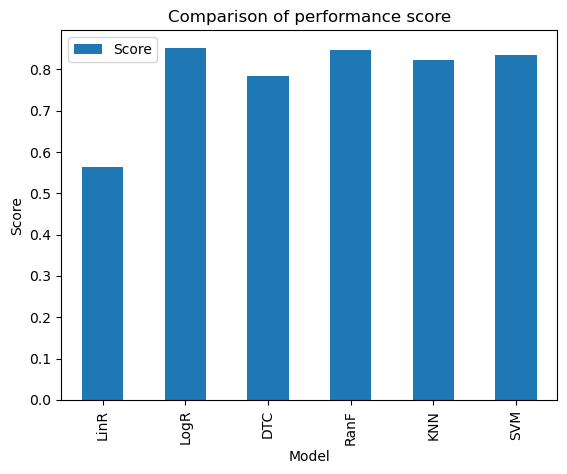

In [22]:
import matplotlib.pyplot as plt

# Create a dataframe with the scores
scores = pd.DataFrame({'Model': ['LinR', 'LogR', 'DTC', 'RanF', 'KNN', 'SVM'], 'Score': [ linr_score, logr_score, dtc_score, rf_score,knn_score, svm_score]})

# Plot the bar graph
scores.plot(x='Model', y='Score', kind='bar')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of performance score')
plt.show()

In [23]:
new_data = np.array([[38.5, 20.2, 16.0, 5004.0, 4.6, 5.0, 55.0, 2.5, 12.5, 4.4, 2.0]])

prediction = model.predict(new_data)
# note: predicted value should be unhealthy

result = 'healthy' if prediction[0] == 1 else 'unhealthy'
print("Predicted value:", result)


Predicted value: unhealthy


/home/sam/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
